### The Delta Rule

In [1]:
%run core.ipynb

   #### Delta Rule Implementation

In [2]:
# %load delta_rule.py
import random
from vector import dotprod


def delta_rule(T, a, da, s=0.01, epochs=50):
    n = len(T[0])
    w, b = n * (random.random(),), random.random()
    for _ in range(epochs):
        for x, y in T:
            z = dotprod(w, x) + b
            az, daz = a(z), da(z)
            d = y - az
            w = tuple(w[i] + s * d * daz * x[i] for i in range(n))
            b = b + s * d * daz
    return w, b


In [3]:
def delta_rule_approx(T, a, da, s=0.01, epochs=50):
    w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
    return lambda x: dotprod(w, x) + b


def run_delta_rule(f, T, a, da, classify, s=0.01, epochs=50):
    r = delta_rule_approx(T, a, da, s=s, epochs=epochs)
    p = lambda x: classify(r(x))
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(_red(f"{f.__name__}: failed"))
    for x, y in T:
        z = p(x)
        if z == y:
            print(f"    {f.__name__}{x} = {y}	a(wx+b) = {_rnd(a(r(x)), n=2)}")
        else:
            print(_red(f"    {f.__name__}{x} = {y} ≠ {z}	a(wx+b) = {_rnd(a(r(x)), n=2)}"))


#### Approximation of Boolean Operators

In [4]:
s, epochs = 0.01, 2500
for f, T in BOOLEAN_TESTDATA.items():
    run_delta_rule(f, T, a=sigmoid, da=dx_sigmoid, classify=heaviside, s=s, epochs=epochs)

AND: ok
    AND(0, 0) = 0	a(wx+b) = 0.1
    AND(0, 1) = 0	a(wx+b) = 0.3
    AND(1, 0) = 0	a(wx+b) = 0.3
    AND(1, 1) = 1	a(wx+b) = 0.61
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.39
    OR(0, 1) = 1	a(wx+b) = 0.79
    OR(1, 0) = 1	a(wx+b) = 0.79
    OR(1, 1) = 1	a(wx+b) = 0.96
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.55
    NAND(0, 1) = 0	a(wx+b) = 0.22
    NAND(1, 0) = 0	a(wx+b) = 0.22
    NAND(1, 1) = 0	a(wx+b) = 0.06
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.52
    XOR(0, 1) = 1	a(wx+b) = 0.5
    XOR(1, 0) = 1	a(wx+b) = 0.5
    XOR(1, 1) = 0	a(wx+b) = 0.48


In [5]:
s, epochs = 0.01, 500
r = 10.0 * random.random()
a, da = lambda x: linear(x, a=r), lambda x: dx_linear(x, a=r)
classify = lambda x: heaviside(x, offset=0.5)
for f, T in BOOLEAN_TESTDATA.items():
    run_delta_rule(f, T, a=linear, da=dx_linear, classify=classify, s=s, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.25
    AND(0, 1) = 0	a(wx+b) = 0.25
    AND(1, 0) = 0	a(wx+b) = 0.25
    AND(1, 1) = 1	a(wx+b) = 0.75
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.28
    OR(0, 1) = 1	a(wx+b) = 0.75
    OR(1, 0) = 1	a(wx+b) = 0.75
    OR(1, 1) = 1	a(wx+b) = 1.23
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.71
    NAND(0, 1) = 0	a(wx+b) = 0.24
    NAND(1, 0) = 0	a(wx+b) = 0.25
    NAND(1, 1) = 0	a(wx+b) = -0.22
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.5
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.5
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 1) = 0	a(wx+b) = 0.49


In [6]:
s, epochs = 0.01, 500
for f, T in BOOLEAN_TESTDATA.items():
    run_delta_rule(f, T, a=tanh, da=dx_tanh, classify=classify, s=s, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.25
    AND(0, 1) = 0	a(wx+b) = 0.24
    AND(1, 0) = 0	a(wx+b) = 0.24
    AND(1, 1) = 1	a(wx+b) = 0.63
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.23
    OR(0, 1) = 1	a(wx+b) = 0.79
    OR(1, 0) = 1	a(wx+b) = 0.79
    OR(1, 1) = 1	a(wx+b) = 0.95
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.59
    NAND(0, 1) = 0	a(wx+b) = 0.23
    NAND(1, 0) = 0	a(wx+b) = 0.23
    NAND(1, 1) = 0	a(wx+b) = -0.21
XOR: failed
    XOR(0, 0) = 0	a(wx+b) = 0.24
    XOR(0, 1) = 1	a(wx+b) = 0.61
    XOR(1, 0) = 1	a(wx+b) = 0.61
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.83


#### Approximation Analysis

Calculate and verify approximation of a separable boolean operator. Run a number of trials to ensure the approximation is stable under the given step length and number of epochs.

In [7]:
def check_boolean_approx(f, a, da, classify, s=0.01, epochs=50, trials=25):
    T = BOOLEAN_TESTDATA[f]
    for _ in range(trials):
        w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
        p = lambda x: classify(dotprod(w, x) + b)
        if not all(p(x) == y for x, y in T):
            return False, (None, None)
    return True, (normed(w), b / norm(w))


Use pandas to display combinations of step length and smallest number of epochs that can be used to approximate a separable boolean operator. 

In [8]:
import pandas as pd


def analyze_boolean_approx(f, a, da, classify, S, E, trials):
    data = []
    for s in S:
        for epochs in sorted(E):
            ok, (w, b) = check_boolean_approx(f, a, da, classify, s=s, epochs=epochs, trials=trials)
            if ok:
                data.append([s, epochs, _rnd(w), _rnd(b)])
                break
    df = pd.DataFrame(data, columns=["Step Length", "Min Epochs", "Weight", "Bias"])
    display(df.style.hide_index())


In [9]:
trials = 25
S = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
E = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]


In [10]:
a, da, classify = sigmoid, dx_sigmoid, heaviside
analyze_boolean_approx(AND, a, da, classify, S, E, trials)


Step Length,Min Epochs,Weight,Bias
0.01,2500,"(0.71, 0.71)",-1.21
0.05,500,"(0.71, 0.71)",-1.17
0.1,250,"(0.71, 0.71)",-1.18
0.5,50,"(0.72, 0.7)",-1.15
1,25,"(0.72, 0.69)",-1.08
5,10,"(0.75, 0.66)",-0.93


In [11]:
a, da, classify = lambda x: 0.5 * linear(x) + 0.5, lambda x: 0.5 * dx_linear(x), heaviside
analyze_boolean_approx(NAND, a, da, classify, S, E, trials)


Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.23
0.05,250,"(-0.7, -0.71)",0.27
0.1,100,"(-0.7, -0.71)",0.28
0.5,25,"(-0.68, -0.74)",0.24
1,10,"(-0.62, -0.79)",0.15


In [12]:
a, da, classify = lambda x: 0.5 * tanh(x) + 0.5, lambda x: 0.5 * dx_tanh(x), heaviside
analyze_boolean_approx(NAND, a, da, classify, S, E, trials)


Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.19
0.05,250,"(-0.71, -0.71)",0.21
0.1,100,"(-0.71, -0.71)",0.23
0.5,25,"(-0.69, -0.72)",0.16
1,25,"(-0.7, -0.72)",0.27
5,10,"(-0.69, -0.72)",0.3


In [13]:
a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=0.4)
analyze_boolean_approx(OR, a, da, classify, S, E, trials)


Step Length,Min Epochs,Weight,Bias
0.01,250,"(0.71, 0.71)",0.36
0.05,50,"(0.7, 0.72)",0.51
0.1,25,"(0.69, 0.73)",0.43


#### Extended Example

In [14]:
def get_annulus_segment_points(x=0.0, y=0.0, r0=0.0, r1=1.0, a0=0.0, a1=math.pi, n=250):
    P = []
    for _ in range(n):
        a, s = random.uniform(a0, a1), random.uniform(r0, r1)
        P.append((x + s * math.cos(a), y + s * math.sin(a)))
    return P


def get_annulus_test_data(x=0.4, y=-0.4, r0=1.1, r1=1.5, n=125):
    A0 = get_annulus_segment_points(r0=r0, r1=r1, n=n)
    A1 = get_annulus_segment_points(x=x, y=y, a0=math.pi, a1=2 * math.pi, r0=r0, r1=r1, n=n) 
    T = [(u, 1) for u in A0] + [(u, 0) for u in A1]
    random.shuffle(T)
    return A0, A1, T


def verify_annulus_classification(a, A0, A1, w, b, classify=heaviside):
    assert all(classify(dotprod(w, x) + b) == 1 for x in A0) and all(classify(dotprod(w, x) + b) == 0 for x in A1)


In [15]:
import matplotlib
import matplotlib.pyplot as plot


def plot_annulus_classification(A0, A1, w, b, t=2.0, size=(6, 6)):
    def ln(x):
        return -x * w[0] / w[1] - b / w[1]

    w, b = normed(w), b / norm(w)
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = plot.axes()
    ax.set_aspect('equal')
    plot.title(f"Seperating Hyperplane w={_rnd(w)}, b={_rnd(b)}")
    plot.grid()
    plot.xlim(-t, t)
    plot.ylim(-t, t)
    plot.plot([x for x, _ in A0], [y for _, y in A0], "x", color="tab:red")
    plot.plot([x for x, _ in A1], [y for _, y in A1], "x", color="tab:blue")
    plot.plot([-t, t], [ln(-t), ln(t)], color="steelblue")
    ax.arrow(0.0, -b / w[1], w[0], w[1], head_width=0.1, head_length=0.15, fc='black', ec='steelblue')
    plot.show()

In [16]:
n = 250
A0, A1, T = get_annulus_test_data(n=n)

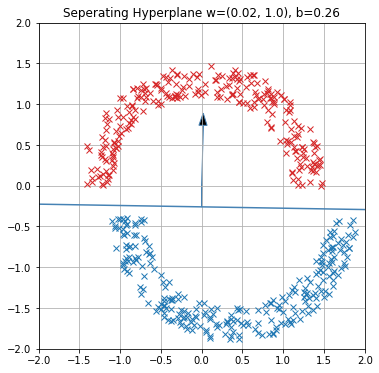

In [17]:
from perceptron import perceptron

w, b = perceptron(T, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, w, b)
verify_annulus_classification(linear, A0, A1, w, b, classify=heaviside)

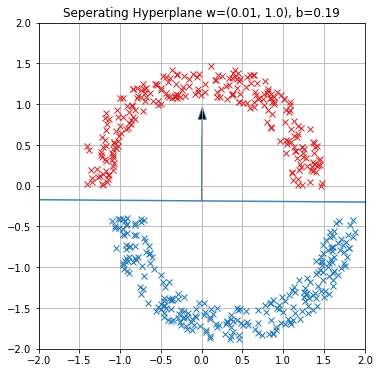

In [18]:
s, epochs = 0.01, 250
a, da, classify = sigmoid, dx_sigmoid, heaviside

w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, w, b)
verify_annulus_classification(a, A0, A1, w, b, classify=heaviside)


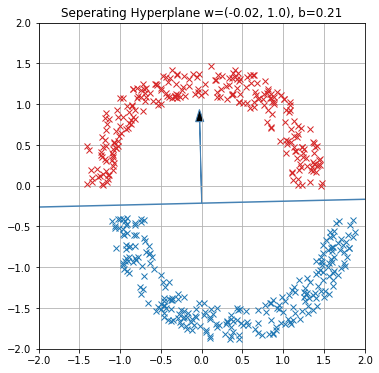

In [19]:
s, epochs = 0.01, 100
a, da, classify = lambda x: 0.5 * linear(x) + 0.5, lambda x: 0.5 * dx_linear(x), heaviside

w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, w, b)
verify_annulus_classification(a, A0, A1, w, b, classify=classify)

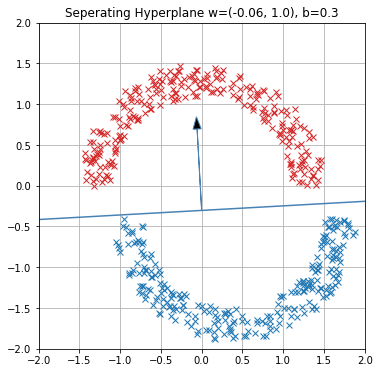

In [22]:
s, epochs = 0.01, 250
offset = 0.4
a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=offset)

w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, w, b - offset)
verify_annulus_classification(a, A0, A1, w, b, classify=classify)

In [21]:
C0, C1 = [a(dotprod(w, x) + b) for x in A0], [a(dotprod(w, x) + b) for x in A1]

min0, max0, min1, max1 = min(C0), max(C0), min(C1), max(C1)

c0 = min0 + 0.5 * (max0 - min0)
c1 = min1 + 0.5 * (max1 - min1)
d = c0 + 0.5 * (c1 - c0)

print(f"A0:	{_rnd(min0)}	{_rnd(max0)}	{_rnd(c0)}")
print(f"A1:	{_rnd(min1)}	{_rnd(max1)}	{_rnd(c1)}")
print(f"MEDIAN:	{_rnd(d)}")

# offset = d
# a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=offset)

# w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
# plot_annulus_classification(A0, A1,  w, b - offset)

A0:	0.52	1.28	0.9
A1:	0.0	0.38	0.19
MEDIAN:	0.54
